# CLASSIFICATION MODELS WITH KERAS

## Objetivos   

* Usar la database de MNIST para entrenar varios sistemas de procesado de imágenes
* Construir una red neuronal
* Entrenarla y testearla



In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Cargamos el dataset MNIST de la libería de Keras el cual ya está dividio en set de entrenamiento y set de prueba.



In [4]:
# importar los datos
from keras.datasets import mnist

# cargarlos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step



Vamos a confirmar el número de imágenes en cada set (atendiendo a la documentación tiene que haber 60.000 imágenes en X_train)

In [5]:
X_train.shape

(60000, 28, 28)


El primer número hace referencia al número de imágenes, y los otros dos el tamaño de las mismas (28 x 28 pixeles).

Visualizamos la primera imágen para tener una idea clara: 


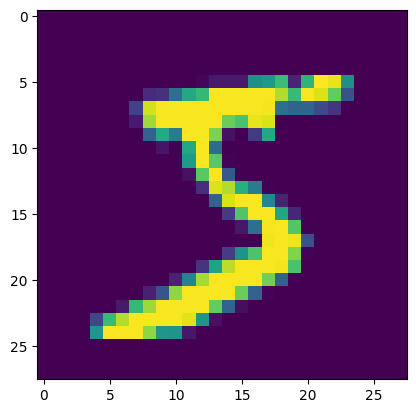

In [7]:
plt.imshow(X_train[0])


Con redes neuronales convencionales, no podemos meter imágenes como inputs asi que las transformamos en vectores de una dimensión: 

In [8]:


num_pixels = X_train.shape[1] * X_train.shape[2] # encontrar el tamaño del vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # aplicar a imágenes de entrenamiento
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # aplicar a imágenes de prueba


Como cada valor del pixel puede ir de 0 a 255, vamos a normalizar los vectores entre 0 y 1

In [9]:

X_train = X_train / 255
X_test = X_test / 255


Por último, empezamos a construir el modelo. Para la clasificación necesitaremos dividir nuestra variable target en categorías: 

In [10]:

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


## Construir una red Neuronal


In [11]:

def classification_model():
    # crear el modelo
    
    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compilar el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Entrenar y testear la red


In [12]:

model = classification_model()

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9440 - loss: 0.1869 - val_accuracy: 0.9670 - val_loss: 0.1062
Epoch 2/10
1875/1875 - 14s - 7ms/step - accuracy: 0.9751 - loss: 0.0787 - val_accuracy: 0.9739 - val_loss: 0.0843
Epoch 3/10
1875/1875 - 16s - 9ms/step - accuracy: 0.9830 - loss: 0.0539 - val_accuracy: 0.9771 - val_loss: 0.0735
Epoch 4/10
1875/1875 - 18s - 10ms/step - accuracy: 0.9872 - loss: 0.0392 - val_accuracy: 0.9770 - val_loss: 0.0784
Epoch 5/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9899 - loss: 0.0316 - val_accuracy: 0.9793 - val_loss: 0.0783
Epoch 6/10
1875/1875 - 16s - 9ms/step - accuracy: 0.9916 - loss: 0.0252 - val_accuracy: 0.9776 - val_loss: 0.0892
Epoch 7/10
1875/1875 - 18s - 9ms/step - accuracy: 0.9929 - loss: 0.0230 - val_accuracy: 0.9793 - val_loss: 0.0826
Epoch 8/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9933 - loss: 0.0209 - val_accuracy: 0.9776 - val_loss: 0.1015
Epoch 9/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9944 - loss: 0.0174 - val_accuracy:


Mostramos la precisión y su error correspondiente

In [13]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.9822999835014343% 
 Error: 0.017700016498565674


Just running 10 epochs could actually take over 20 minutes. But enjoy the results as they are getting generated.



A veces, dependiendo de como sea nuestro modelo de complejo, nos será imposible reentrenarlo cada vez que lo queramos utilizar. Keras nos permite guardarlo después de entrenarlo para luego poder usarlo: 

In [14]:
model.save('classification_model.keras')


Cuando queramos usarlo solo hay que llamar al método load_model: 

In [15]:
pretrained_model = keras.saving.load_model('classification_model.keras')

### Ejercicio Práctico 1




Crear una red neuronal con 6 layers y comparar las precisiones

In [16]:
def classification_model():
    # crear el modelo
    
    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compilar el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


model_6layers= classification_model()

model_6layers.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

scores_6layers = model_6layers.evaluate(X_test, y_test, verbose=0)

print('Accuracy_3_layers: {}% \n Accuracy_6_layers: {}'.format(scores[1], scores_6layers[1])) 

Epoch 1/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9317 - loss: 0.2252 - val_accuracy: 0.9652 - val_loss: 0.1195
Epoch 2/10
1875/1875 - 18s - 9ms/step - accuracy: 0.9705 - loss: 0.1003 - val_accuracy: 0.9686 - val_loss: 0.1123
Epoch 3/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9782 - loss: 0.0721 - val_accuracy: 0.9746 - val_loss: 0.0950
Epoch 4/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9831 - loss: 0.0569 - val_accuracy: 0.9776 - val_loss: 0.0779
Epoch 5/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9870 - loss: 0.0446 - val_accuracy: 0.9765 - val_loss: 0.1127
Epoch 6/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9884 - loss: 0.0400 - val_accuracy: 0.9753 - val_loss: 0.1009
Epoch 7/10
1875/1875 - 38s - 20ms/step - accuracy: 0.9900 - loss: 0.0339 - val_accuracy: 0.9787 - val_loss: 0.0773
Epoch 8/10
1875/1875 - 18s - 9ms/step - accuracy: 0.9913 - loss: 0.0301 - val_accuracy: 0.9788 - val_loss: 0.0844
Epoch 9/10
1875/1875 - 25s - 13ms/step - accuracy: 0.9926 - loss: 0.0251 - val_accu

### Ejercicio Práctico 2



Ahora, cargamos el modelo entrenado que hemos guardardo, lo entrenamos con 10 épocas más y comprobamos la precisión: 

In [17]:
# Write your code here
#load the saved model
pretrained_model = keras.saving.load_model('classification_model.keras')

print("Pre-trained model loaded successufully")

# Further train the loaded model
pretrained_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores_20_epochs = pretrained_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy_10_epochs: {}% \n Accuracy_20_epochs: {}'.format(scores[1], scores_20_epochs[1])) 

Pre-trained model loaded successufully
Epoch 1/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9958 - loss: 0.0141 - val_accuracy: 0.9816 - val_loss: 0.0892
Epoch 2/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9957 - loss: 0.0135 - val_accuracy: 0.9776 - val_loss: 0.1035
Epoch 3/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9958 - loss: 0.0142 - val_accuracy: 0.9819 - val_loss: 0.0949
Epoch 4/10
1875/1875 - 14s - 8ms/step - accuracy: 0.9964 - loss: 0.0123 - val_accuracy: 0.9803 - val_loss: 0.1045
Epoch 5/10
1875/1875 - 14s - 7ms/step - accuracy: 0.9961 - loss: 0.0138 - val_accuracy: 0.9830 - val_loss: 0.1086
Epoch 6/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9972 - loss: 0.0099 - val_accuracy: 0.9809 - val_loss: 0.1111
Epoch 7/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9968 - loss: 0.0111 - val_accuracy: 0.9820 - val_loss: 0.1078
Epoch 8/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9976 - loss: 0.0086 - val_accuracy: 0.9842 - val_loss: 0.0925
Epoch 9/10
1875/1875 - 13s - 7ms/step - accuracy:

Convergencia Rápida: MNIST es un dataset que permite obtener precisiones superiores al 95% muy rápidamente (incluso en las primeras épocas) debido a la clara diferenciación de sus rasgos por lo que no se verá un gran aumento de precisión al aumentar el número de hidden layers o de épocas. 